In [57]:
# Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [58]:
# Read the Data

main_frame = pd.read_csv('data/Data_p1.csv', index_col=0)
main_frame.rename(columns={'DEVICEID': 'device', 'vehicleId': 'vehicle', 'PASSDATETIME': 'time'}, inplace=True)
main_frame

,device,vehicle,time
0,101610,40321227460,307695
1,101827,97316881507,307704
2,76431,37948514480,307653
3,74093,86086297520,307671
4,99895,49049583630,307836
...,...,...,...
5999995,37385,41569730560,377095
5999996,43881,60215825530,305667
5999997,43881,60438593730,305544
5999998,42726,67401542877,377055


In [59]:
# Remove Possible Errors
# Remove the vehicles that are seen once

errors_removed_frame = main_frame[(main_frame.groupby('vehicle').size()[main_frame['vehicle']] > 1).values]
errors_removed_frame

,device,vehicle,time
0,101610,40321227460,307695
1,101827,97316881507,307704
2,76431,37948514480,307653
4,99895,49049583630,307836
7,100805,46993588180,307564
...,...,...,...
5999995,37385,41569730560,377095
5999996,43881,60215825530,305667
5999997,43881,60438593730,305544
5999998,42726,67401542877,377055


In [60]:
# Sort based on time

time_sorted_frame = errors_removed_frame.sort_values('time', ascending=True)
time_sorted_frame

,device,vehicle,time
2622957,80015,89604059727,0
1425995,37434,18062963190,0
1754005,100210,61168110204,0
3593889,79168,108852887770,0
4343357,100273,95814345593,1
...,...,...,...
2622959,95856,21902376620,424999
2983737,73799,71467890817,424999
4128513,100154,106018278250,424999
3896285,73743,38111409630,424999


In [61]:
# A Sorted Array of Device IDs

devices = np.unique(time_sorted_frame['device'].values)
devices

array([    12,     19,     26, ..., 108841, 108869, 108897], dtype=int64)

In [62]:
# Group By Vehicle IDs

groupby_vehicle = time_sorted_frame.groupby('vehicle')

In [63]:
# Creating an adjacency matrix of total traffic flow recorded between two devices

total_traffic_flow = pd.DataFrame(np.zeros((len(devices), len(devices))), columns= devices, index=devices)

for group in groupby_vehicle:
    _group_id, data = group
    previous_device_id = None

    for index in range(len(data)):
        if previous_device_id:
            total_traffic_flow[data.iloc[index]['device']][previous_device_id] += 1
        
        previous_device_id = data.iloc[index]['device']
    
print('from \ to')

total_traffic_flow

from \ to


,12,19,26,33,54,61,68,75,82,89,...,108736,108750,108764,108778,108792,108806,108820,108841,108869,108897
12,0.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,2.0,10.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,1.0,0.0,1.0,0.0,1.0,8.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
108820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
108841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
108869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Defining a Traffic Flow Map Plotter

def plot_traffic_flow(map_data_frame, layout_data_frame=None, title=None):
    G = nx.from_pandas_edgelist(
        map_data_frame,
        source='from',
        target='to',
        edge_attr='weight'  # Set Edge Attribute to Weight Column
    )

    try:
        layout_graph = nx.from_pandas_edgelist(
            layout_data_frame,
            source='from',
            target='to',
        )

    except:
        layout_graph = G

    _fig, ax = plt.subplots()
    pos = nx.circular_layout(layout_graph)
    plt.title(title)
    nx.draw_networkx_nodes(G, pos, ax=ax)
    road_widths = np.fromiter(nx.get_edge_attributes(G, 'weight').values(), dtype=float) / 5
    nx.draw_networkx_edges(G, pos, width=road_widths, ax=ax)   # Thicker lines represent heavier flows
    _ = nx.draw_networkx_labels(G, pos, ax=ax)

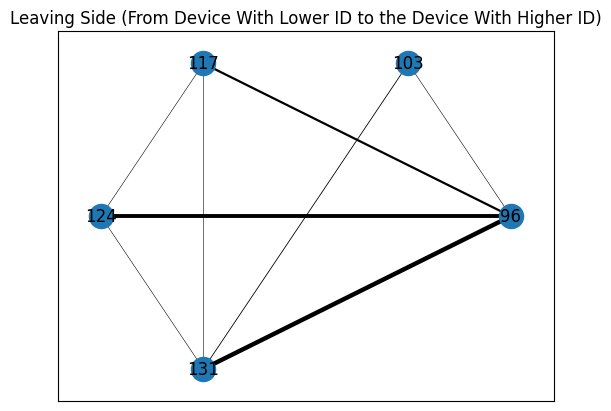

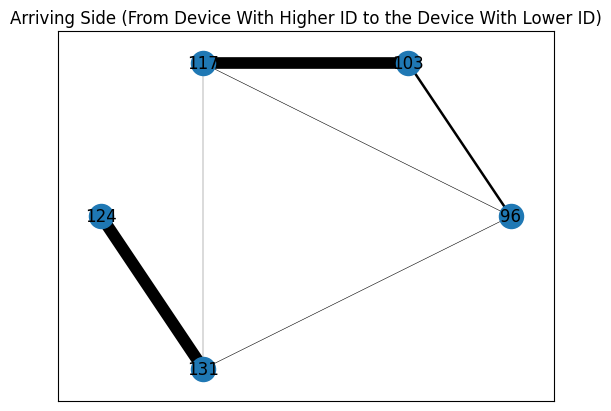

In [65]:
# Plotting a Map of the Total Traffic Flow Between Selected Devices

selected_traffic_flow = total_traffic_flow.iloc[10:16, 10:16]   # Select a set of devices

from_ = np.repeat(selected_traffic_flow.index, len(selected_traffic_flow.index))
to_ = np.repeat(np.array([selected_traffic_flow.index]), len(selected_traffic_flow.index), axis=0).flatten()
leaving_weight = np.triu( selected_traffic_flow.values, k=1).flatten()
arriving_weight = np.tril(selected_traffic_flow.values, k=-1).flatten()

# Total Departures Recorded For Selected Devices
leaving_side_total = pd.DataFrame({
    'from': from_,
    'to': to_,
    'weight': leaving_weight
})    # From Device With Lower ID to the Device With Higher ID

# Total Arrivings Recorded For Selected Devices
arriving_side_total = pd.DataFrame({
    'from': from_,
    'to': to_,
    'weight': arriving_weight
})    # From Device With Higher ID to the Device With Lower ID

devices_layout = pd.DataFrame({
    'from': selected_traffic_flow.index,
    'to': selected_traffic_flow.index,
})    

plot_traffic_flow(
    leaving_side_total[leaving_side_total['weight'] != 0], 
    layout_data_frame=devices_layout,
    title='Leaving Side (From Device With Lower ID to the Device With Higher ID)'
)
plot_traffic_flow(
    arriving_side_total[arriving_side_total['weight'] != 0], 
    layout_data_frame=devices_layout,
    title='Arriving Side (From Device With Higher ID to the Device With Lower ID)'
)

In [66]:
# Adjacency Matrix for Departure Percent to Each of the Other Devices

number_of_departures = total_traffic_flow.values.sum(1)
total_traffic_flow_t = np.transpose(total_traffic_flow.values)
total_traffic_flow_percent = pd.DataFrame(
    np.transpose(np.divide(total_traffic_flow_t, number_of_departures, out=np.zeros_like(total_traffic_flow_t), where=number_of_departures!=0)), 
    columns= devices, 
    index=devices
)

print('from \ to')

total_traffic_flow_percent

from \ to


,12,19,26,33,54,61,68,75,82,89,...,108736,108750,108764,108778,108792,108806,108820,108841,108869,108897
12,0.000000,0.023529,0.105882,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
19,0.043478,0.000000,0.000000,0.000000,0.000000,0.014493,0.014493,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
26,0.000000,0.009259,0.009259,0.037037,0.000000,0.000000,0.000000,0.000000,0.018519,0.027778,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
33,0.023810,0.119048,0.035714,0.023810,0.000000,0.011905,0.000000,0.011905,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
54,0.038462,0.000000,0.038462,0.000000,0.038462,0.307692,0.115385,0.038462,0.000000,0.038462,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.105263,0.0,0.0,0.105263,0.000000,0.000000,0.0,0.000000
108820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.153846,0.000000,0.0,0.0,0.000000,0.076923,0.000000,0.0,0.000000
108841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.007299,0.0,0.000000
108869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
